In [1]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the model
loaded_model = tf.keras.models.load_model('your_model.h5')

In [18]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 4500 files belonging to 3 classes.


In [20]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [21]:
#samples to be used
train_size = 0.8
len(dataset)*train_size

112.80000000000001

In [22]:
train_ds = dataset.take(1)
len(train_ds)

1

In [23]:
test_ds = dataset.skip(112)
len(test_ds)

29

1/1 [==============================] - 0s 68ms/step


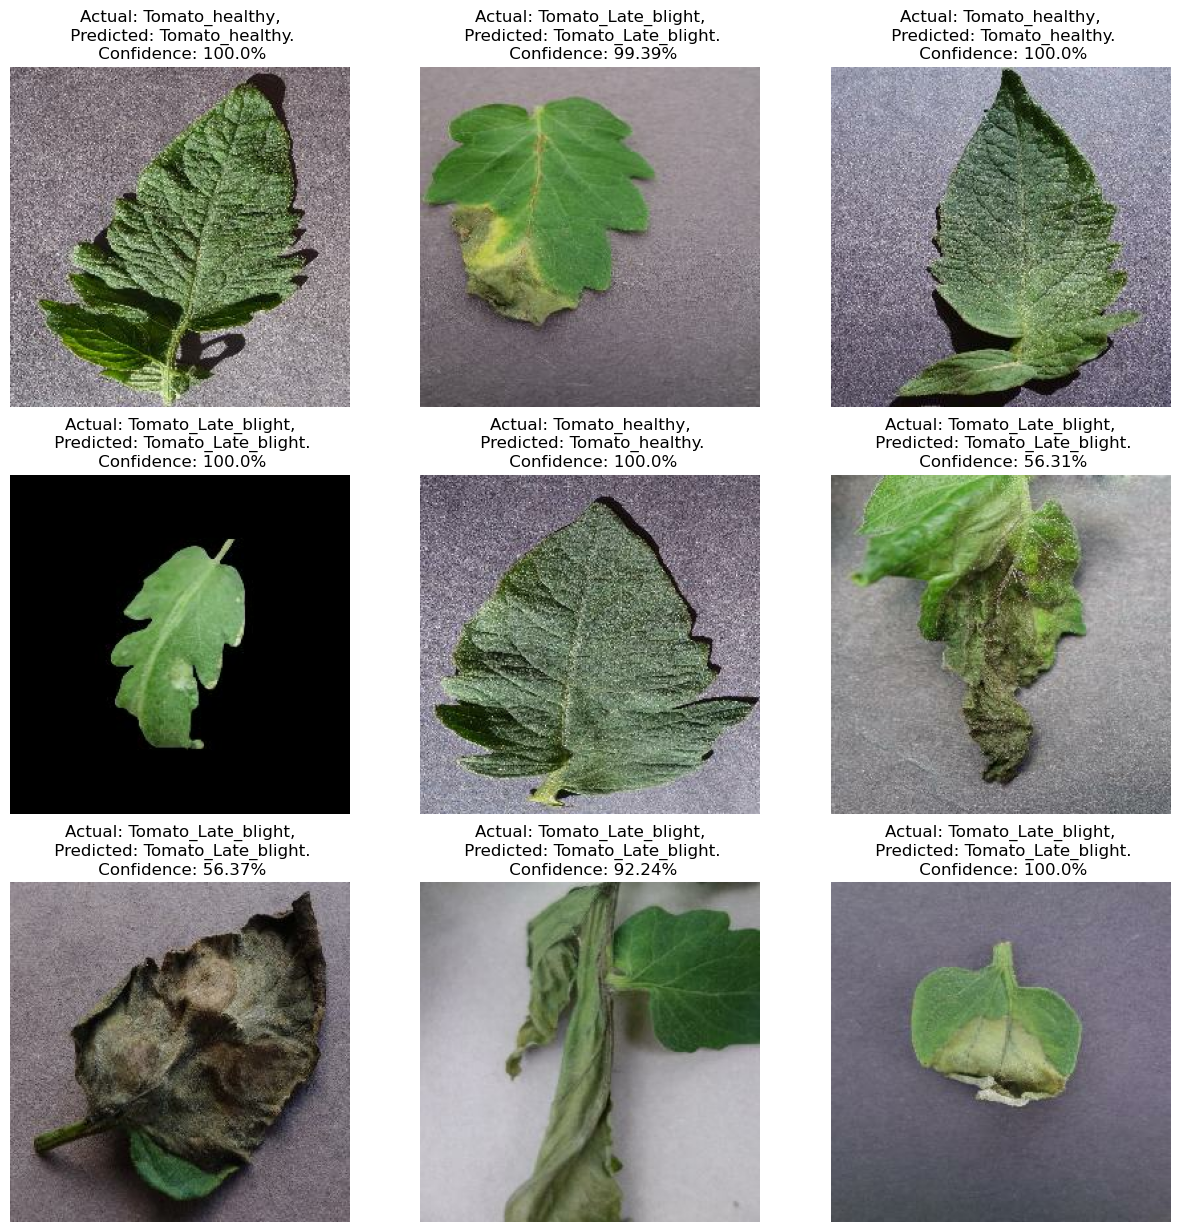

In [24]:


# Load training history
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

# Assuming you have the test dataset loaded as test_ds

# Function to predict
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(loaded_model, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

plt.show()


1/1 [==============================] - 0s 261ms/step


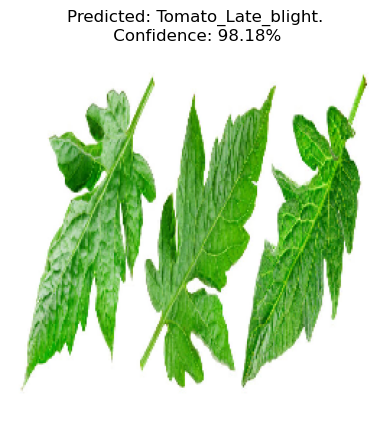

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
loaded_model = tf.keras.models.load_model('your_model.h5')

# Load class names
# class_names = np.array([class_name.decode() for class_name in open('class_names.txt', 'rb').readlines()])

# Function to predict
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Example of predicting a random image
img_path = 'healthy_leaf.jpg'  # Replace with the path to your random image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))

plt.imshow(img)
plt.axis("off")

predicted_class, confidence = predict(loaded_model, img)
plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")
plt.show()
